3 flows graph of bbr3 without staggered Upload

✅ CSV saved to: /home/sit/Downloads/Test_C/cubic vs bbrv3/bbr3_vs_cubic_metrics.csv


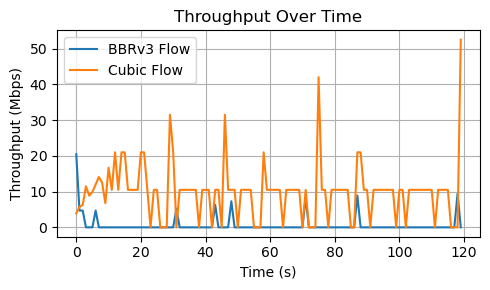

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/throughput.png


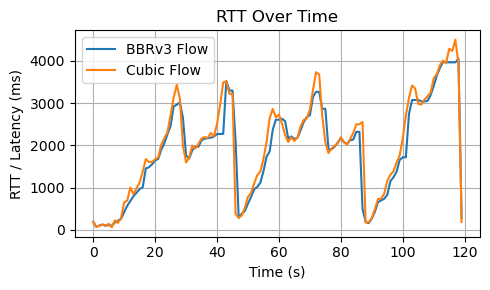

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/rtt.png


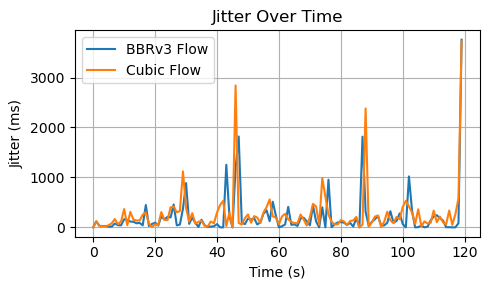

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/jitter.png


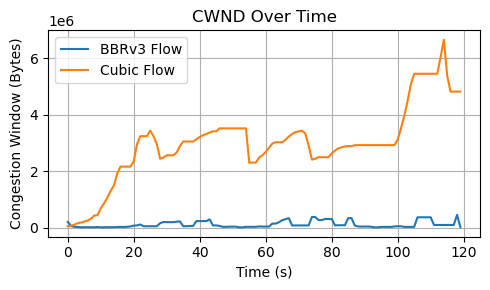

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/cwnd.png


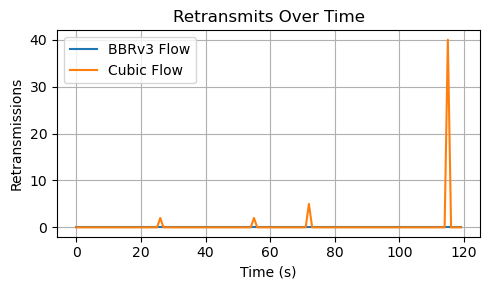

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/retransmits.png


In [42]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # Add offset (0 for no staggering)
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    for label, group in df.groupby("label"):
        plt.plot(group["time_sec"], group[metric], label=label)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")



def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr_results_7.json",
        "Cubic": "cubic_results_7.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")


    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "Throughput Over Time", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "RTT Over Time", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "Jitter Over Time", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "CWND Over Time", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "Retransmits Over Time", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------------------
# ✅ Run the function with your directory
process_mixed_algos(
    folder_path="/home/sit/Downloads/Test_C/cubic vs bbrv3",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


✅ CSV saved to: /home/sit/Downloads/Test_C/cubic vs bbrv3/bbr3_vs_cubic_metrics.csv


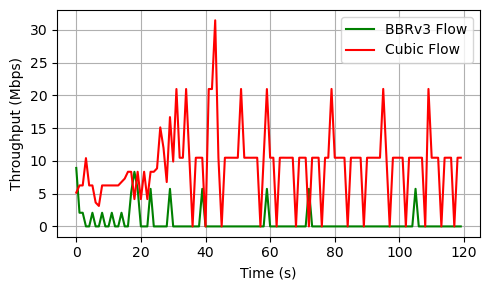

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/throughput.png


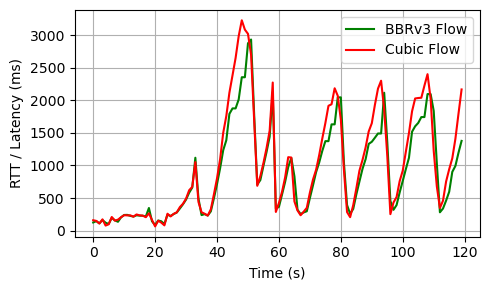

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/rtt.png


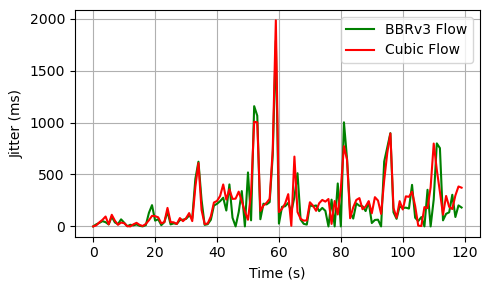

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/jitter.png


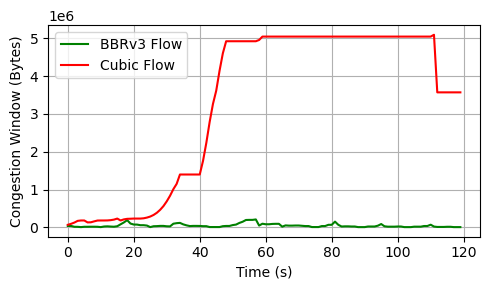

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/cwnd.png


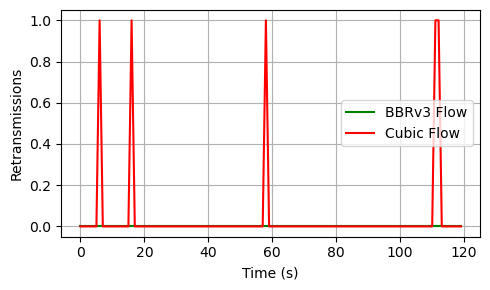

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3/mixed_algo_plots/retransmits.png


In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # No staggering
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "BBRv3 Flow": "green",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr_results_3.json",
        "Cubic": "cubic_results_3.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------
# ✅ Run the function with your directory
process_mixed_algos(
    folder_path="/home/sit/Downloads/Test_C/cubic vs bbrv3",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


Download- Scenario cubic vs BBR

✅ CSV saved to: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/bbr3_vs_cubic_metrics.csv


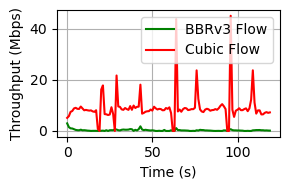

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/mixed_algo_plots/throughput.png


In [60]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # Add offset (0 for no staggering)
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(3, 2))
    color_map = {
        "BBRv3 Flow": "green",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")



def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr_results_2.json",
        "Cubic": "cubic_results_2.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")


    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "RTT Over Time", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", "Jitter Over Time", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "CWND Over Time", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", "Retransmits Over Time", os.path.join(plot_dir, "retransmits.png"))

# ----------------------------------------------------
# ✅ Run the function with your directory
process_mixed_algos(
    folder_path="/home/sit/Downloads/Test_C/cubic vs bbrv3 download",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ CSV saved to: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/bbr3_vs_cubic_metrics.csv


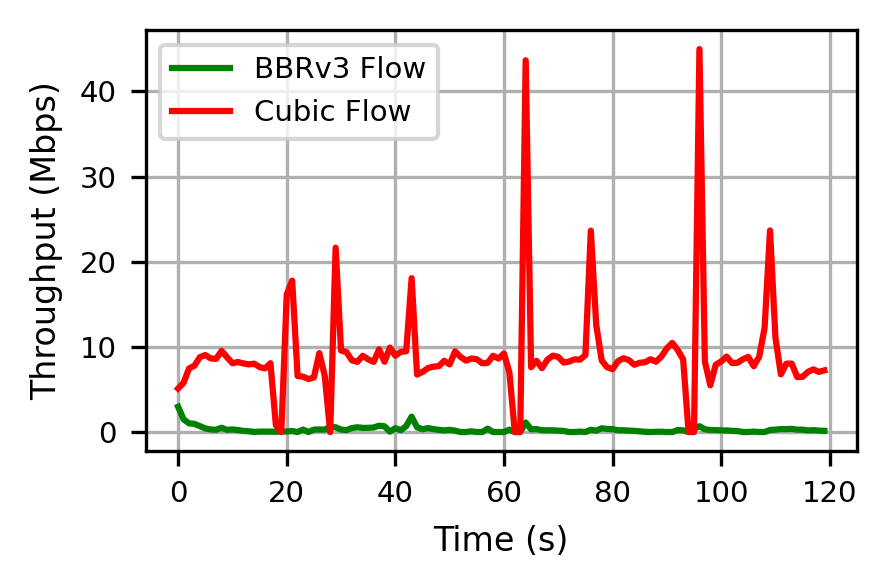

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/mixed_algo_plots/throughput.eps


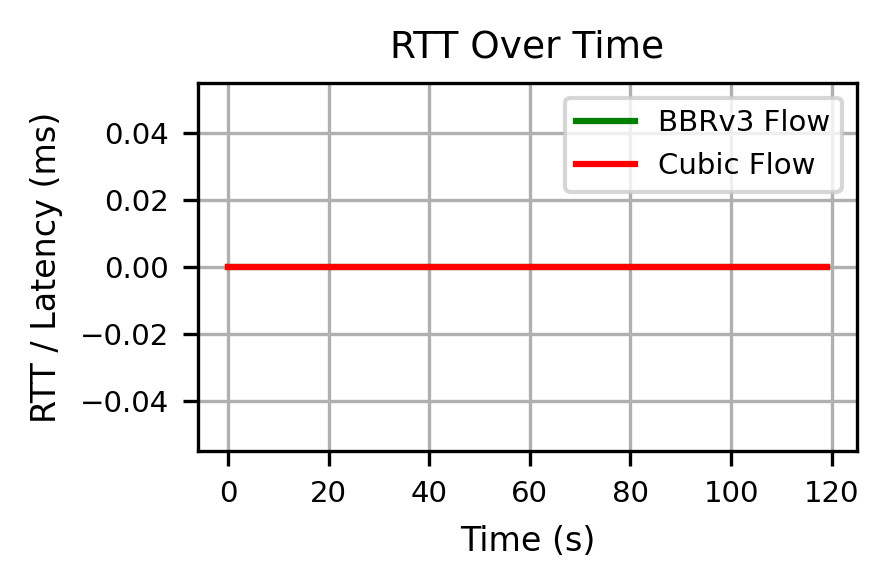

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/mixed_algo_plots/rtt.eps


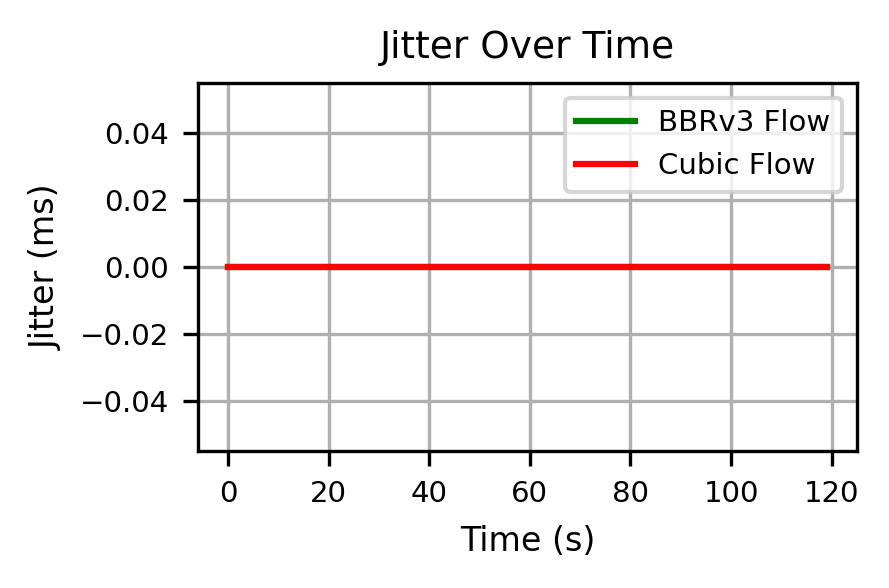

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/mixed_algo_plots/jitter.eps


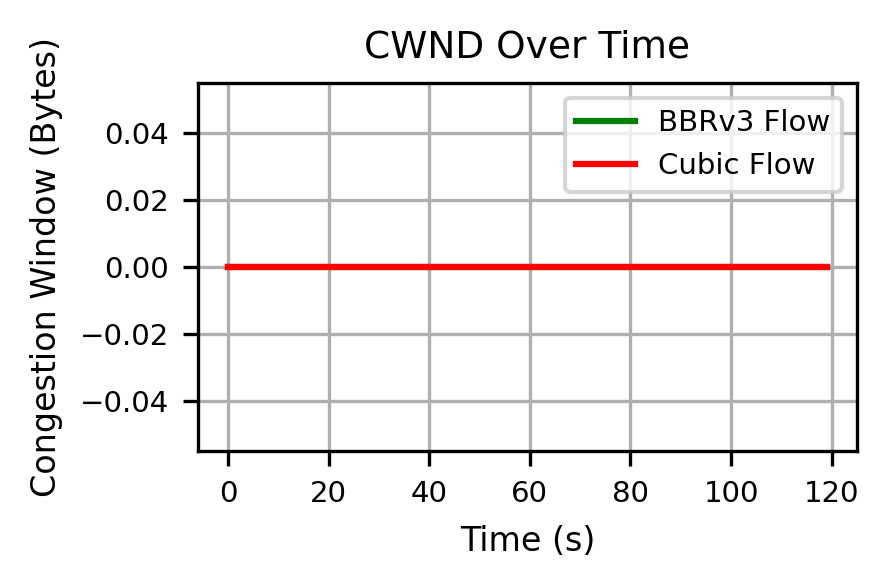

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/mixed_algo_plots/cwnd.eps


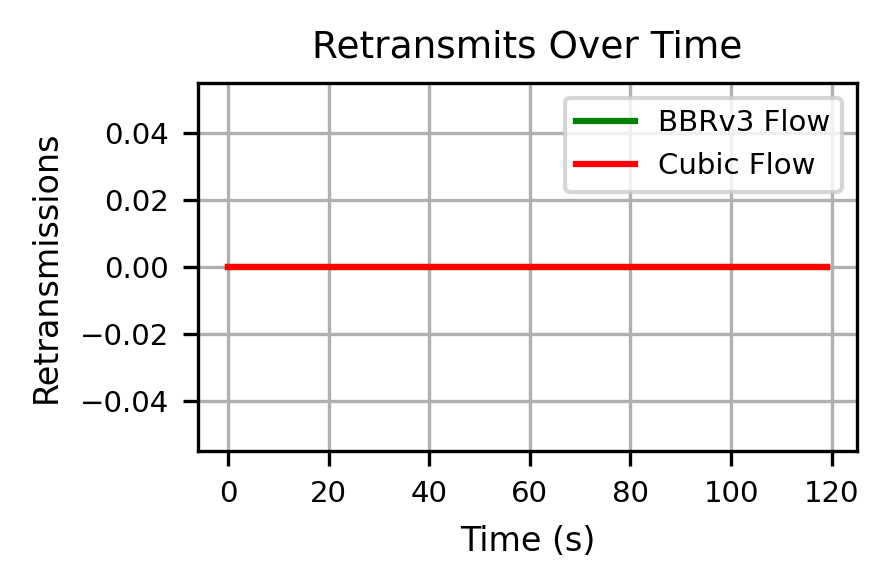

✅ Saved: /home/sit/Downloads/Test_C/cubic vs bbrv3 download/mixed_algo_plots/retransmits.eps


In [64]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set consistent plot style
plt.rcParams.update({
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 9,
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "figure.dpi": 300
})

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(3, 2))
    color_map = {
        "BBRv3 Flow": "green",
        "Cubic Flow": "red"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(save_path, bbox_inches='tight', format='eps')
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_mixed_algos(folder_path, output_csv_name):
    all_data = []

    algo_files = {
        "BBRv3": "bbr_results_2.json",
        "Cubic": "cubic_results_2.json"
    }

    for algo_name, filename in algo_files.items():
        filepath = os.path.join(folder_path, filename)
        label = f"{algo_name} Flow"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create plot directory
    plot_dir = os.path.join(folder_path, "mixed_algo_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Save all plots as EPS files
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.eps"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "RTT Over Time", os.path.join(plot_dir, "rtt.eps"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "Jitter Over Time", os.path.join(plot_dir, "jitter.eps"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "CWND Over Time", os.path.join(plot_dir, "cwnd.eps"))
    plot_metric(df_all, "retransmits", "Retransmissions", "Retransmits Over Time", os.path.join(plot_dir, "retransmits.eps"))

# ----------------------------------------------------
# ✅ Run with your target folder
process_mixed_algos(
    folder_path="/home/sit/Downloads/Test_C/cubic vs bbrv3 download",
    output_csv_name="bbr3_vs_cubic_metrics.csv"
)


BBR3 Staggered each flow 15 s  flow 1,2 and 3 stars at 0,15 and 30 second respectively

❌ File not found: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/bbr3_flow4_3.json
❌ File not found: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/bbr3_flow5_3.json
✅ CSV saved to: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/tcp_metrics_3_flows_15s_staggered.csv


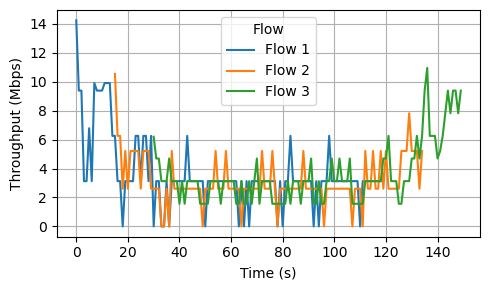

✅ Saved: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/bbrv3_plots/throughput.png


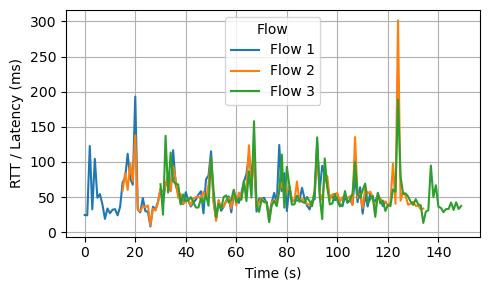

✅ Saved: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/bbrv3_plots/rtt.png


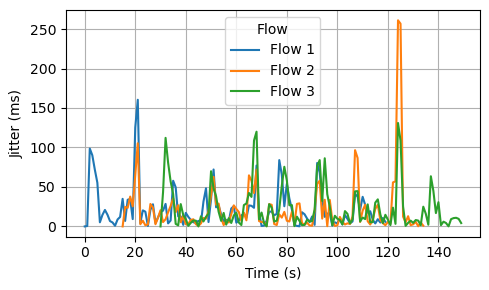

✅ Saved: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/bbrv3_plots/jitter.png


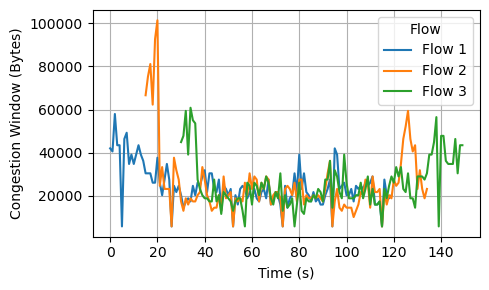

✅ Saved: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/bbrv3_plots/cwnd.png


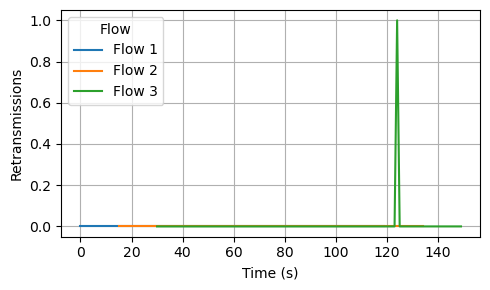

✅ Saved: /home/sit/Downloads/Test_C/bbrv3 staggered_3 flows/bbrv3_plots/retransmits.png


In [50]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    for label, group in df.groupby("label"):
        plt.plot(group["time_sec"], group[metric], label=label)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 6):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = (i - 1) * 15  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    
    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
    file_pattern="bbr3_flow{}_3.json",  # Match actual filenames
    output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
    algo_name="BBRv3"
)


BBRv3 3 flows without staggered upload 

❌ File not found: //home/sit/Downloads/Test_C/bbrv3 3 flows/bbr3_flow4_2.json
❌ File not found: //home/sit/Downloads/Test_C/bbrv3 3 flows/bbr3_flow5_2.json
✅ CSV saved to: //home/sit/Downloads/Test_C/bbrv3 3 flows/tcp_metrics_3flows3.csv


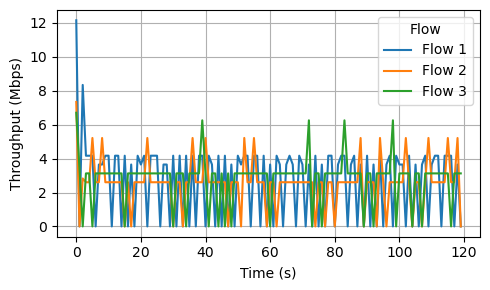

✅ Saved: //home/sit/Downloads/Test_C/bbrv3 3 flows/bbrv3_plots/throughput.png


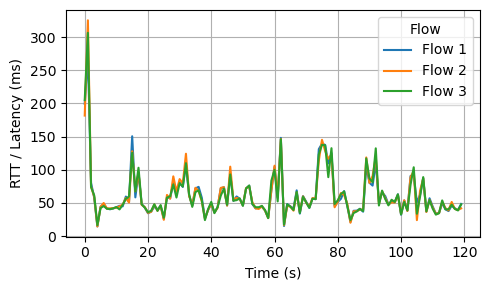

✅ Saved: //home/sit/Downloads/Test_C/bbrv3 3 flows/bbrv3_plots/rtt.png


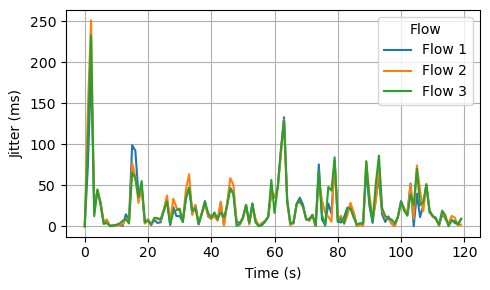

✅ Saved: //home/sit/Downloads/Test_C/bbrv3 3 flows/bbrv3_plots/jitter.png


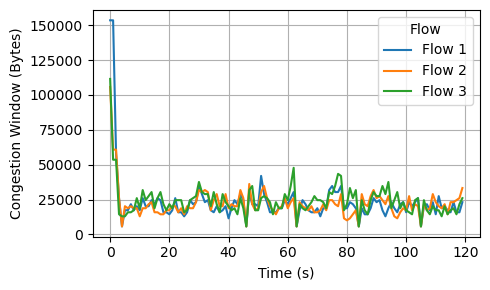

✅ Saved: //home/sit/Downloads/Test_C/bbrv3 3 flows/bbrv3_plots/cwnd.png


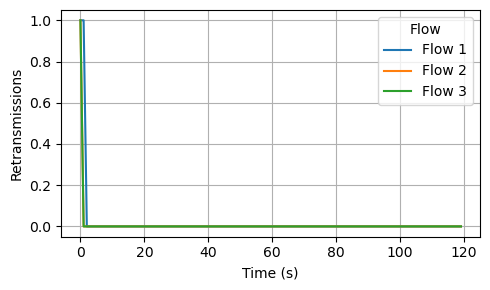

✅ Saved: //home/sit/Downloads/Test_C/bbrv3 3 flows/bbrv3_plots/retransmits.png


In [51]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i,
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    for label, group in df.groupby("label"):
        plt.plot(group["time_sec"], group[metric], label=label)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")
   


def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 6):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)


    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ To run it (for BBR):
process_tcp_flows(
    folder_path="//home/sit/Downloads/Test_C/bbrv3 3 flows",
    file_pattern="bbr3_flow{}_2.json",  # Adjust this pattern for your file names
    output_csv_name="tcp_metrics_3flows3.csv",
    algo_name="BBRv3"
)


✅ CSV saved to: /home/sit/Downloads/Test_C/bbr3_2flows/upload/tcp_metrics_2flows.csv


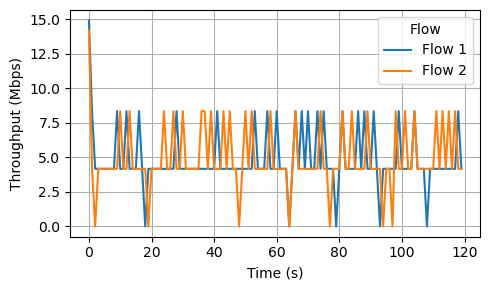

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/throughput.png


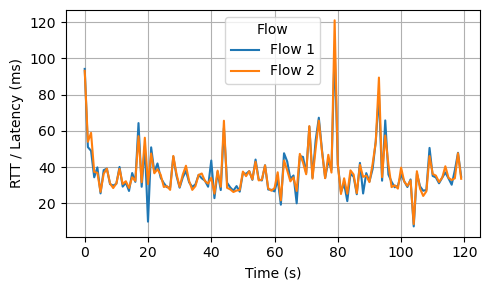

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/rtt.png


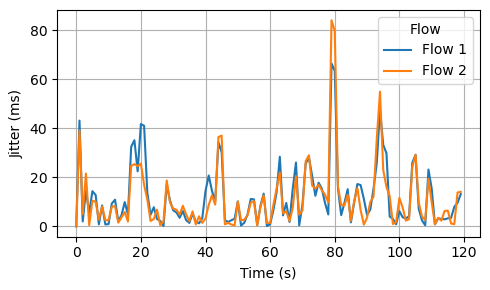

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/jitter.png


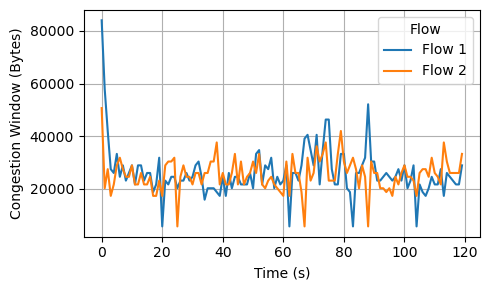

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/cwnd.png


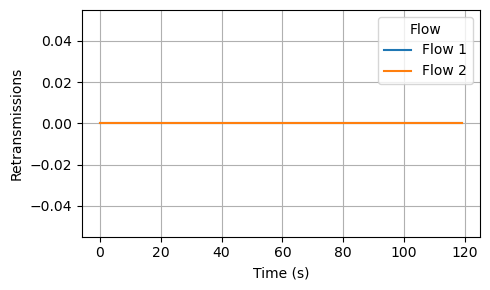

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/retransmits.png


In [52]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i,
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    for label, group in df.groupby("label"):
        plt.plot(group["time_sec"], group[metric], label=label)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):  # Only 2 flows
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))
# ✅ Run this for your case
if __name__ == "__main__":
    process_tcp_flows(
        folder_path="/home/sit/Downloads/Test_C/bbr3_2flows/upload",
        file_pattern="bbr3_flow{}_2.json",  # Adjust this pattern for your filenames
        output_csv_name="tcp_metrics_2flows.csv",
        algo_name="BBRv3"
    )


✅ CSV saved to: /home/sit/Downloads/Test_C/bbr3_2flows/upload/tcp_metrics_2flows.csv


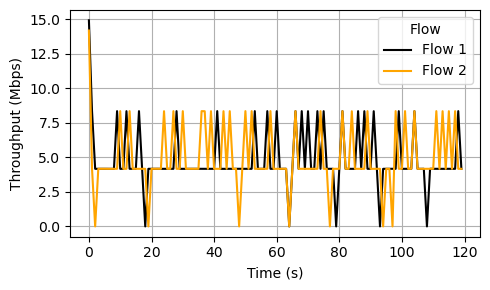

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/throughput.png


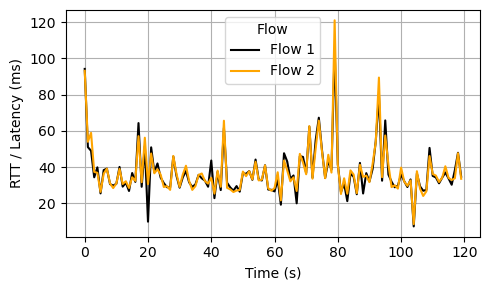

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/rtt.png


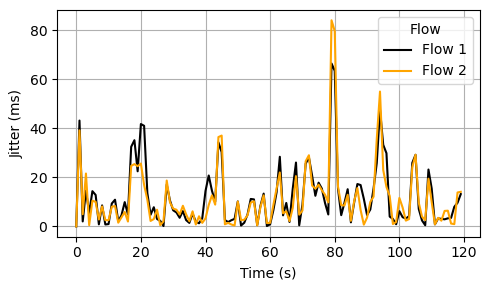

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/jitter.png


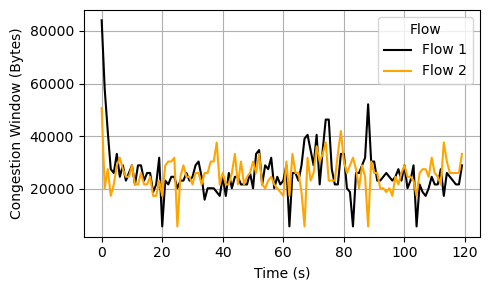

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/cwnd.png


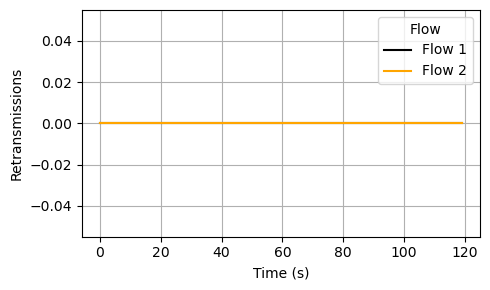

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/upload/bbrv3_plots/retransmits.png


In [53]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i,
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):  # Only 2 flows
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

 
    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", "", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", "", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", "", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", "", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", "", os.path.join(plot_dir, "retransmits.png"))
# ✅ Run this for your case
if __name__ == "__main__":
    process_tcp_flows(
        folder_path="/home/sit/Downloads/Test_C/bbr3_2flows/upload",
        file_pattern="bbr3_flow{}_2.json",
        output_csv_name="tcp_metrics_2flows.csv",
        algo_name="BBRv3"
    )


✅ CSV saved to: /home/sit/Downloads/Test_C/bbr3_2flows/download/tcp_metrics_2flows.csv


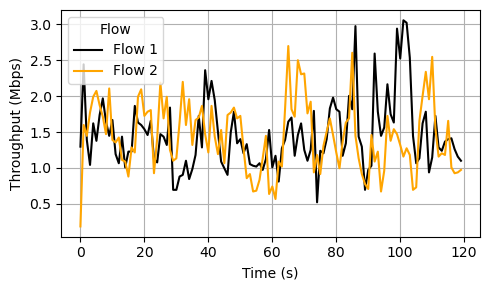

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows/download/bbrv3_plots/throughput.png


In [54]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i,
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")



# def plot_metric(df, metric, ylabel, title, save_path):
#     plt.figure(figsize=(10, 6))
#     color_map = {
#         "Flow 1": "black",
#         "Flow 2": "orange"
#     }

#     for label, group in df.groupby("label"):
#         color = color_map.get(label, None)
#         plt.plot(group["time_sec"], group[metric], label=label, color=color)
#     plt.figure(figsize=(10, 6))
#     for label, group in df.groupby("label"):
#         plt.plot(group["time_sec"], group[metric], label=label)
#     plt.xlabel("Time (s)")
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend(title="Flow")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(save_path)
#     plt.show()
#     plt.close()
#     print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):  # Only 2 flows
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            df = extract_metrics(filepath, label)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)

    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"{algo_name} RTT Over Time", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"{algo_name} Jitter Over Time", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"{algo_name} CWND Over Time", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", f"{algo_name} Retransmits Over Time", os.path.join(plot_dir, "retransmits.png"))

# ✅ Run this for your case
if __name__ == "__main__":
    process_tcp_flows(
        folder_path="/home/sit/Downloads/Test_C/bbr3_2flows/download",
        file_pattern="bbr3_flow{}_3.json",  # Adjust this pattern for your filenames
        output_csv_name="tcp_metrics_2flows.csv",
        algo_name="BBRv3"
    )


✅ CSV saved to: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/upload/tcp_metrics_2_flows_15s_staggered.csv


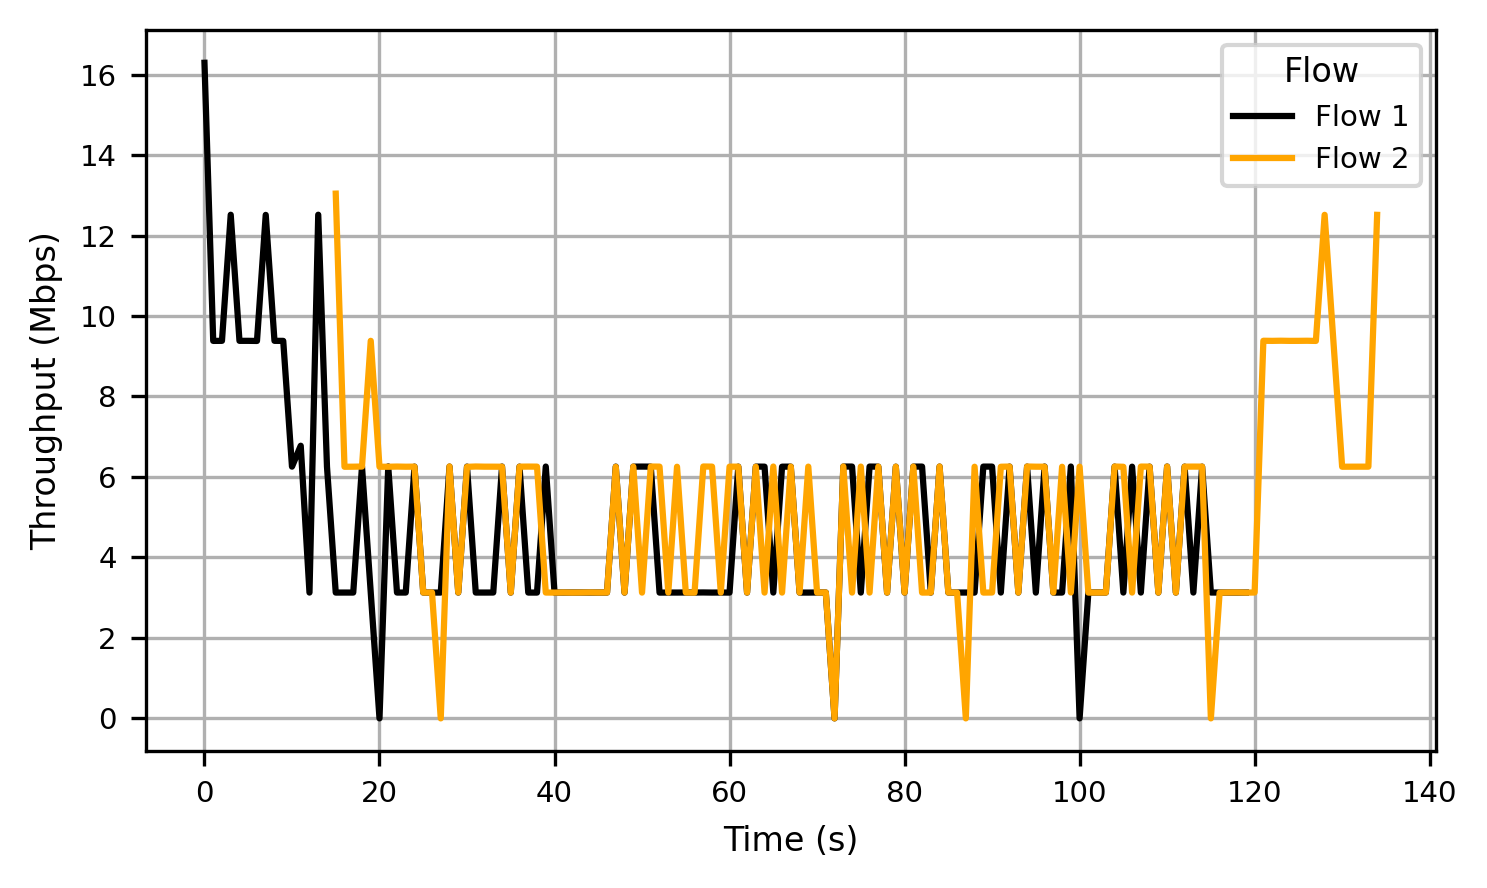

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/upload/bbrv3_plots/throughput.png


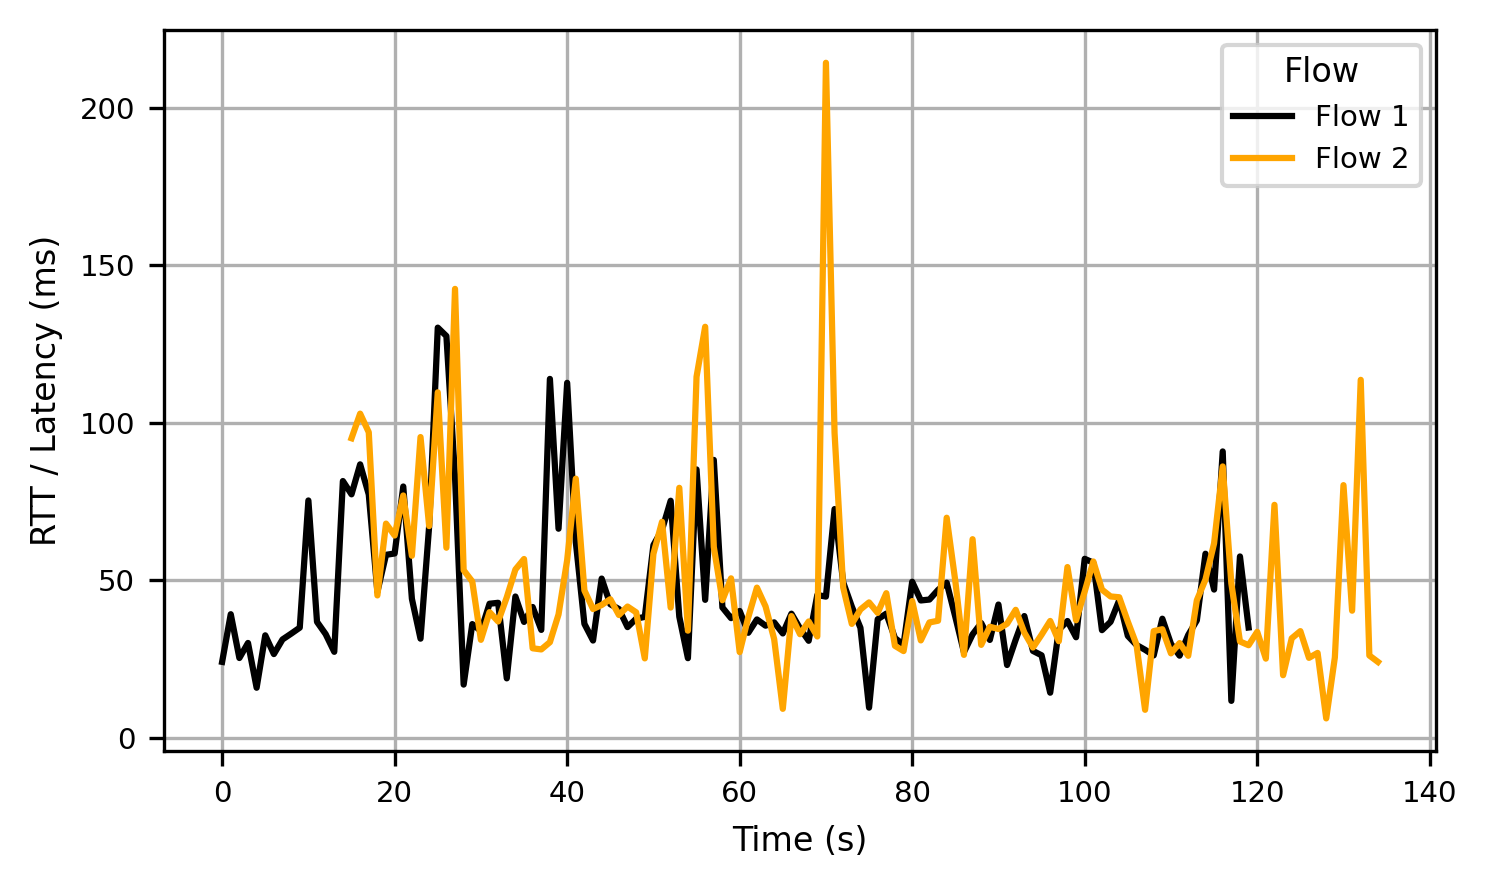

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/upload/bbrv3_plots/rtt.png


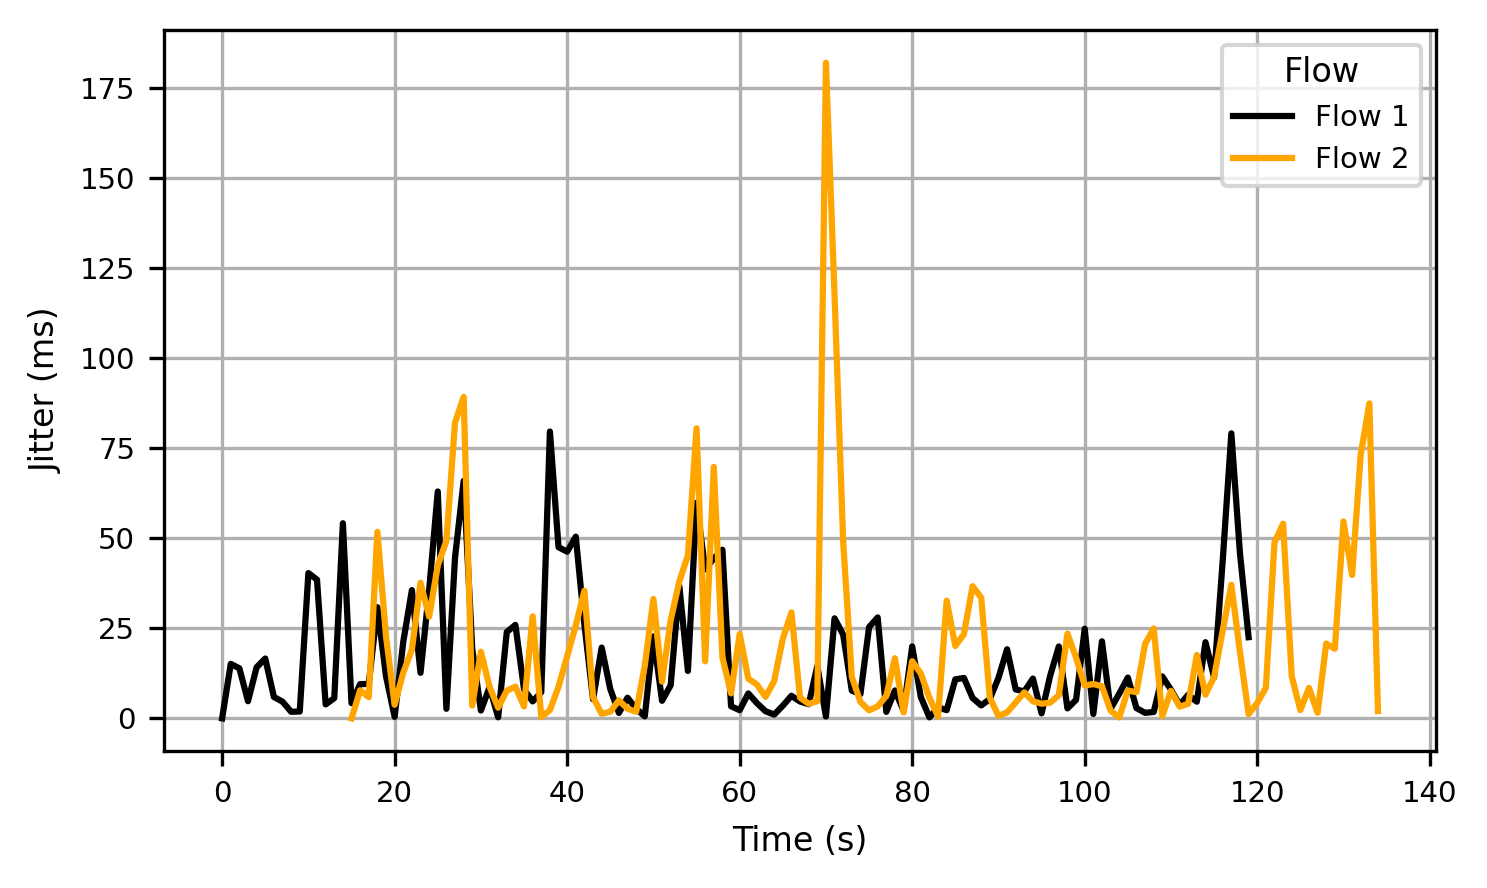

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/upload/bbrv3_plots/jitter.png


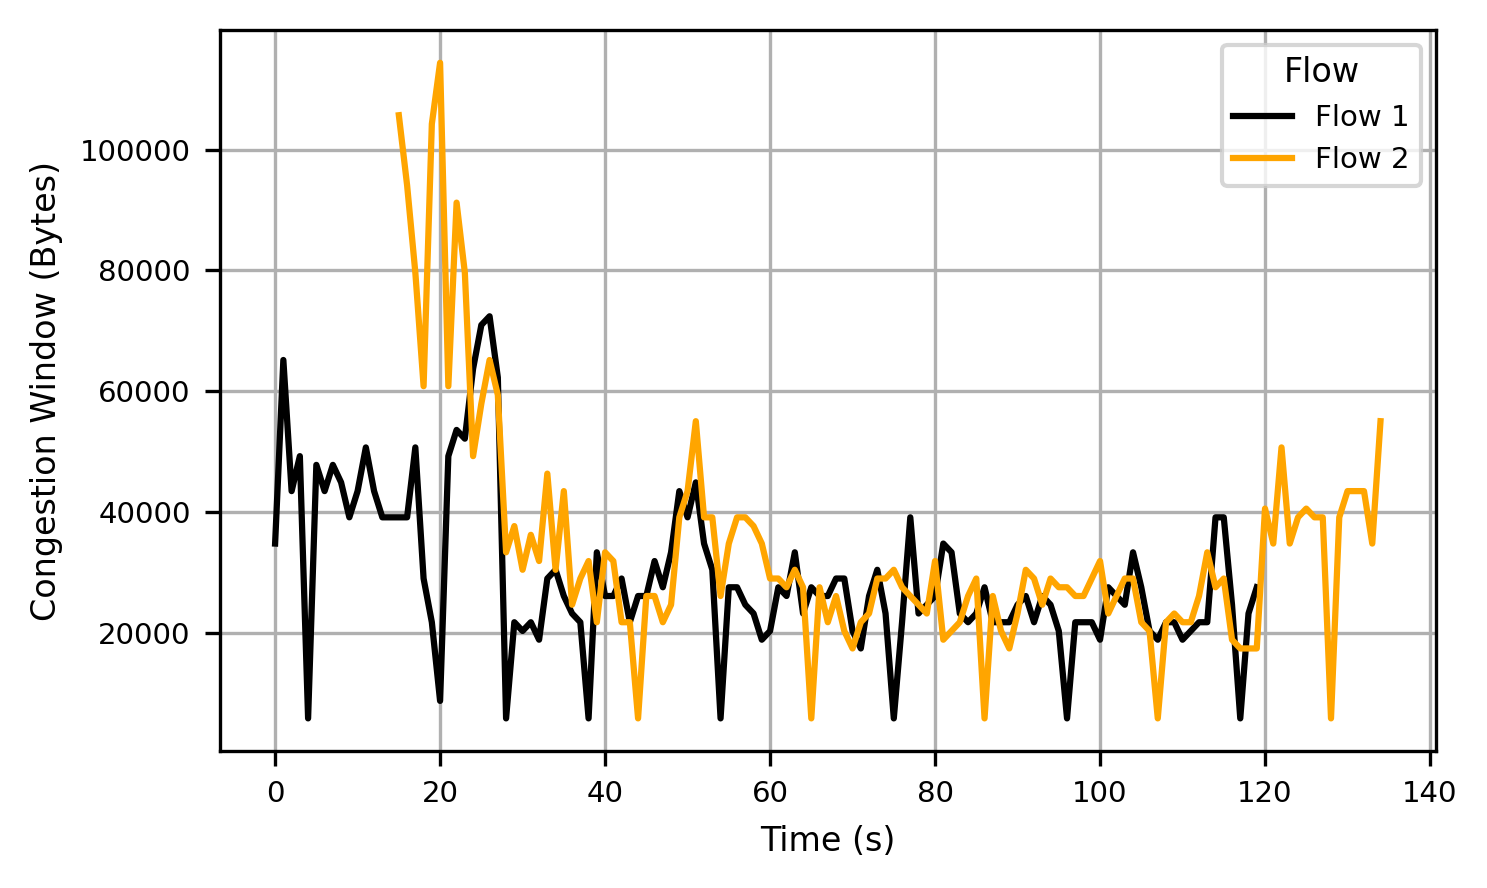

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/upload/bbrv3_plots/cwnd.png


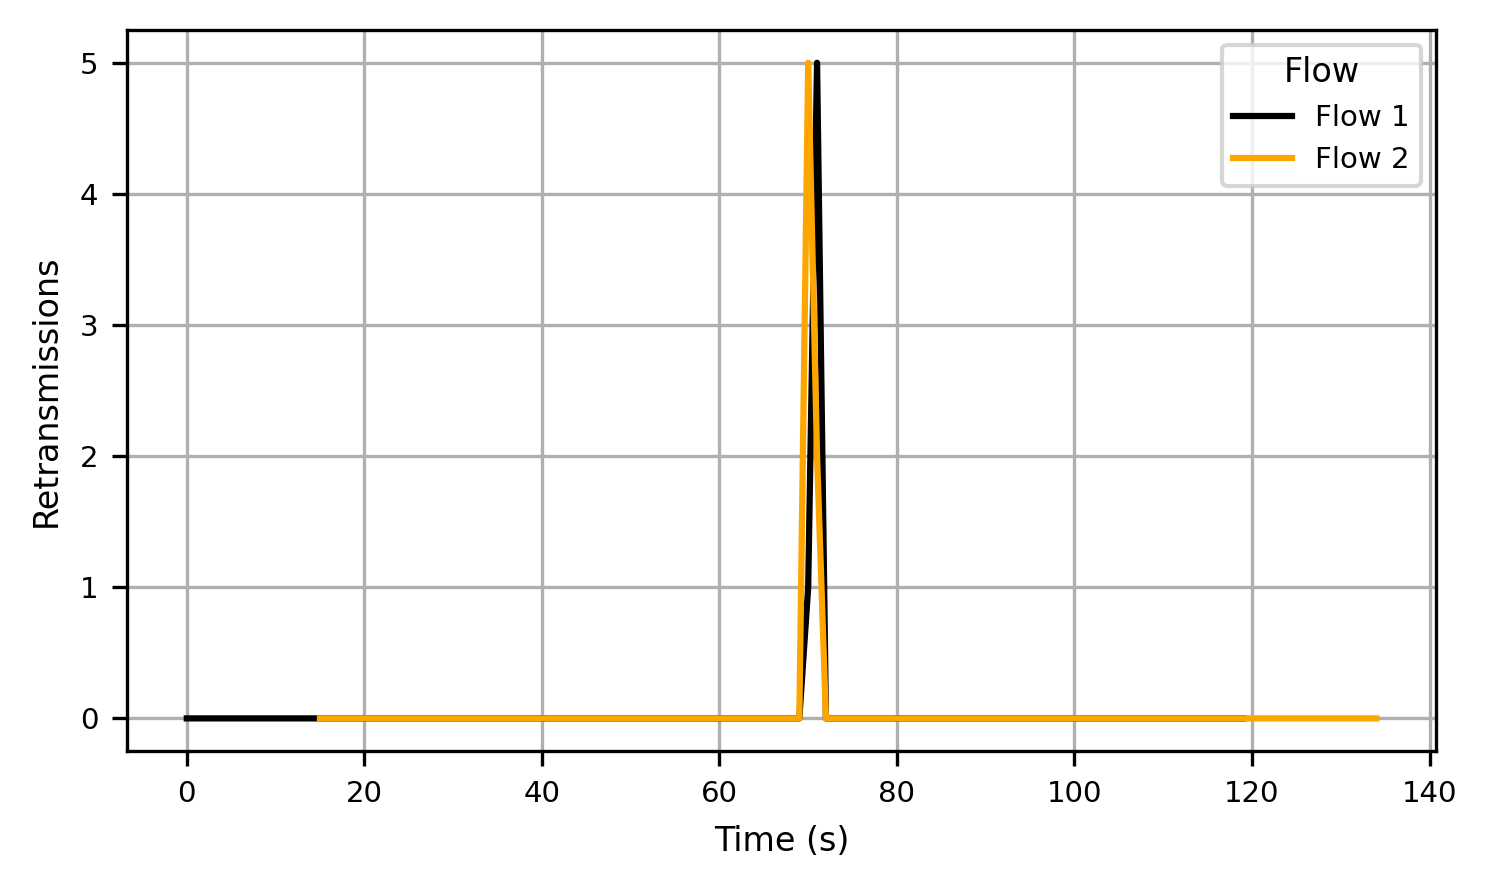

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/upload/bbrv3_plots/retransmits.png


In [68]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)


def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")


# def plot_metric(df, metric, ylabel, title, save_path):
#     plt.figure(figsize=(5, 3))
#     for label, group in df.groupby("label"):
#         plt.plot(group["time_sec"], group[metric], label=label)
#     plt.xlabel("Time (s)")
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend(title="Flow")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(save_path)
#     plt.show()
#     plt.close()
#     print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 3):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = (i - 1) * 15  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"", os.path.join(plot_dir, "rtt.png"))
    plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"", os.path.join(plot_dir, "jitter.png"))
    plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"", os.path.join(plot_dir, "cwnd.png"))
    plot_metric(df_all, "retransmits", "Retransmissions", f"", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Downloads/Test_C/bbr3_2flows_staggered/upload",
    file_pattern="bbr3_flow{}_1.json",  # Match actual filenames
    output_csv_name="tcp_metrics_2_flows_15s_staggered.csv",
    algo_name="BBRv3"
)


❌ File not found: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/download/bbr3_flow3_3.json
❌ File not found: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/download/bbr3_flow4_3.json
❌ File not found: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/download/bbr3_flow5_3.json
✅ CSV saved to: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/download/tcp_metrics_2_flows_15s_staggered.csv


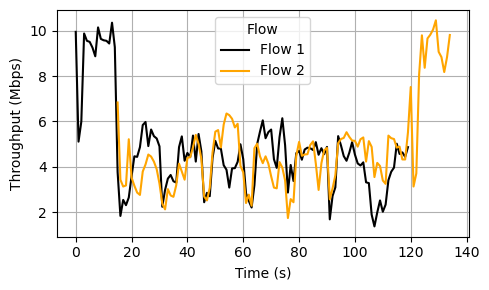

✅ Saved: /home/sit/Downloads/Test_C/bbr3_2flows_staggered/download/bbrv3_plots/throughput.png


In [56]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_metrics(filepath, label, time_offset=0):
    with open(filepath) as f:
        data = json.load(f)

    metrics = []
    prev_rtt_ms = None

    for i, interval in enumerate(data.get("intervals", [])):
        stream = interval["streams"][0]
        rtt_ms = stream.get("rtt", 0) / 1000  # Convert µs to ms
        jitter_ms = abs(rtt_ms - prev_rtt_ms) if prev_rtt_ms is not None else 0
        prev_rtt_ms = rtt_ms

        metrics.append({
            "time_sec": i + time_offset,  # 🕒 Add offset for staggered start
            "throughput_mbps": stream.get("bits_per_second", 0) / 1e6,
            "rtt_ms": rtt_ms,
            "jitter_ms": jitter_ms,
            "cwnd_bytes": stream.get("snd_cwnd", 0),
            "retransmits": stream.get("retransmits", 0),
            "label": label
        })

    return pd.DataFrame(metrics)

def plot_metric(df, metric, ylabel, title, save_path):
    plt.figure(figsize=(5, 3))
    color_map = {
        "Flow 1": "black",
        "Flow 2": "orange"
    }

    for label, group in df.groupby("label"):
        color = color_map.get(label, None)
        plt.plot(group["time_sec"], group[metric], label=label, color=color)

    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(title="Flow")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()
    plt.close()
    print(f"✅ Saved: {save_path}")

# def plot_metric(df, metric, ylabel, title, save_path):
#     plt.figure(figsize=(10, 6))
#     for label, group in df.groupby("label"):
#         plt.plot(group["time_sec"], group[metric], label=label)
#     plt.xlabel("Time (s)")
#     plt.ylabel(ylabel)
#     plt.title(title)
#     plt.legend(title="Flow")
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(save_path)
#     plt.show()
#     plt.close()
#     print(f"✅ Saved: {save_path}")

def process_tcp_flows(folder_path, file_pattern, output_csv_name, algo_name):
    all_data = []

    for i in range(1, 6):
        filename = file_pattern.format(i)
        filepath = os.path.join(folder_path, filename)
        label = f"Flow {i}"
        if os.path.exists(filepath):
            time_offset = (i - 1) * 15  # ⏱️ Stagger each flow by 15s
            df = extract_metrics(filepath, label, time_offset)
            all_data.append(df)
        else:
            print(f"❌ File not found: {filepath}")

    if not all_data:
        print("⚠️ No data to process.")
        return

    df_all = pd.concat(all_data, ignore_index=True)
    
    # Save CSV
    output_csv = os.path.join(folder_path, output_csv_name)
    df_all.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to: {output_csv}")

    # Create directory for plots
    plot_dir = os.path.join(folder_path, f"{algo_name.lower()}_plots")
    os.makedirs(plot_dir, exist_ok=True)

    # Plot metrics
    plot_metric(df_all, "throughput_mbps", "Throughput (Mbps)", f"", os.path.join(plot_dir, "throughput.png"))
    # plot_metric(df_all, "rtt_ms", "RTT / Latency (ms)", f"{algo_name} RTT Over Time", os.path.join(plot_dir, "rtt.png"))
    # plot_metric(df_all, "jitter_ms", "Jitter (ms)", f"{algo_name} Jitter Over Time", os.path.join(plot_dir, "jitter.png"))
    # plot_metric(df_all, "cwnd_bytes", "Congestion Window (Bytes)", f"{algo_name} CWND Over Time", os.path.join(plot_dir, "cwnd.png"))
    # plot_metric(df_all, "retransmits", "Retransmissions", f"{algo_name} Retransmits Over Time", os.path.join(plot_dir, "retransmits.png"))

# --------------------------------------------
# ✅ Example: To run it (e.g., for BBRv3)
# process_tcp_flows(
#     folder_path="/home/sit/Downloads/Test_C/bbrv3 staggered_3 flows",
#     file_pattern="bbr3_15s_ststaggered_flow{}.json",  # Adjust pattern as needed
#     output_csv_name="tcp_metrics_3_flows_15s_staggered.csv",
#     algo_name="BBRv3"
# )
process_tcp_flows(
    folder_path="/home/sit/Downloads/Test_C/bbr3_2flows_staggered/download",
    file_pattern="bbr3_flow{}_3.json",  # Match actual filenames
    output_csv_name="tcp_metrics_2_flows_15s_staggered.csv",
    algo_name="BBRv3"
)
